##### Extracting frames from Video

In [2]:
import cv2  # OpenCV
import os   # For file_handling

In [2]:
# Video path
video_path = r"E:\IITR-Acads\Sem5\ECN-316\Course project\Python Scripts\001 Preliminarires\videoplayback.mp4"

# Define the output directory for extracted frames
output_dir = r"E:\IITR-Acads\Sem5\ECN-316\Course project\Python Scripts\001 Preliminarires\extracted_frames"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the video
cap = cv2.VideoCapture(video_path)

frame_count = 0

# Loop through the video frames
while cap.isOpened():
    ret, frame = cap.read()     # ret = true if frame returnd, else false
    
    # Check if a frame was successfully read
    if not ret:
        print("Completed frame extraction")
        break

    # Save the current frame as an image file in the output directory
    frame_name = os.path.join(output_dir, f'frame_{frame_count:04d}.png')
    cv2.imwrite(frame_name, frame)
    frame_count += 1

# Release the video capture object
cap.release()

print(f'Total frames extracted: {frame_count} and saved in {output_dir}')


Completed frame extraction
Total frames extracted: 1691 and saved in E:\IITR-Acads\Sem5\ECN-316\Course project\Python Scripts\001 Preliminarires\extracted_frames


##### Apply convolution operations on extracted frames

In [3]:
import numpy as np

In [4]:
# Image Frame path
frame_path = r"E:\IITR-Acads\Sem5\ECN-316\Course project\Python Scripts\001 Preliminarires\extracted_frames\frame_0000.png"
image = cv2.imread(frame_path)


In [5]:
# Convert image to grayscale

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

file_name = "Grayscale_image.jpg"

output_path = f"E:\\IITR-Acads\\Sem5\\ECN-316\\Course project\\Python Scripts\\001 Preliminarires\\filtered_image\\{file_name}"
cv2.imwrite(output_path, image)

True

##### Gaussian kernel

In [6]:
# Gaussain kernel
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16  

In [7]:
# Perform convolution
convolved_image = cv2.filter2D(image, -1, kernel)

In [8]:
# Save convolved image

file_name = "gaussian_output.jpg"

output_path = f"E:\\IITR-Acads\\Sem5\\ECN-316\\Course project\\Python Scripts\\001 Preliminarires\\filtered_image\\{file_name}"
cv2.imwrite(output_path, convolved_image)


True

##### Laplacian (in horizontal and vertical direction)

In [9]:
# Laplacian kernel
kernel = np.array([[1, 1, 1],
                   [1, -4, 1],
                   [1, 1, 1]]) 

In [10]:
# Perform convolution
convolved_image = cv2.filter2D(image, -1, kernel)

In [11]:
# Save convolved image

file_name = "Laplacian1_output.jpg"

output_path = f"E:\\IITR-Acads\\Sem5\\ECN-316\\Course project\\Python Scripts\\001 Preliminarires\\filtered_image\\{file_name}"
cv2.imwrite(output_path, convolved_image)


True

##### Laplacian (in horizontal, vertical and diagonal direction)

In [12]:
# Laplacian kernel
kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]]) 

In [13]:
# Perform convolution
convolved_image = cv2.filter2D(image, -1, kernel)

In [14]:
# Save convolved image

file_name = "Laplacian2_output.jpg"

output_path = f"E:\\IITR-Acads\\Sem5\\ECN-316\\Course project\\Python Scripts\\001 Preliminarires\\filtered_image\\{file_name}"
cv2.imwrite(output_path, convolved_image)

True

##### Base image + Laplacian

In [15]:
highlighted_image = 0.5*image + 0.5*convolved_image

file_name = "Edge_Highlight_output.jpg"

output_path = f"E:\\IITR-Acads\\Sem5\\ECN-316\\Course project\\Python Scripts\\001 Preliminarires\\filtered_image\\{file_name}"
cv2.imwrite(output_path, highlighted_image)

True

##### Base image - Gaussian average

In [16]:
# Gaussian kernel
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16  

# Perform convolution
convolved_image = cv2.filter2D(image, -1, kernel)

highboost_image = 0.5*image - 0.5*convolved_image

In [17]:
file_name = "Unsharp_masking_output.jpg"

output_path = f"E:\\IITR-Acads\\Sem5\\ECN-316\\Course project\\Python Scripts\\001 Preliminarires\\filtered_image\\{file_name}"
cv2.imwrite(output_path, highlighted_image)

True

#### Kirsch Operator for Pixel edge intensity calculation

In [18]:
# Kernels for Kirsch operator

g_1 = np.array([[5, 5, 5],
                [-3, 0, -3],
                [-3, -3, -3]]) 

g_2 = np.array([[5, 5, -3],
                [5, 0, -3],
                [-3, -3, -3]]) 

g_3 = np.array([[5, -3, -3],
                [5, 0, -3],
                [5, -3, -3]]) 

g_4 = np.array([[-3, -3, -3],
                [5, 0, -3],
                [5, 5, -3]]) 

g_5 = np.array([[-3, -3, -3],
                [-3, 0, -3],
                [5, 5, 5]]) 

g_6 = np.array([[-3, -3, -3],
                [-3, 0, 5],
                [-3, 5, 5]])  

g_7 = np.array([[-3, -3, 5],
                [-3, 0, 5],
                [-3, -3, 5]])  

g_8 = np.array([[-3, 5, 5],
                [-3, 0, 5],
                [-3, -3, -3]])  


In [19]:
d1 = cv2.filter2D(image, -1, g_1)
d2 = cv2.filter2D(image, -1, g_2)
d3 = cv2.filter2D(image, -1, g_3)
d4 = cv2.filter2D(image, -1, g_4)
d5 = cv2.filter2D(image, -1, g_5)
d6 = cv2.filter2D(image, -1, g_6)
d7 = cv2.filter2D(image, -1, g_7)
d8 = cv2.filter2D(image, -1, g_8)

dA = d1**2 + d2**2 + d3**2 + d4**2 + d5**2 + d6**2 + d7**2 + d8**2

In [20]:
# Check number of elements greater than threshold to get edge pixel number

T = 1200    # From paper

count = np.sum(dA >= T)

print(count)

0


In [21]:
print(f'Min value in dA: {np.min(dA)}')
print(f'Max value in dA: {np.max(dA)}')

Min value in dA: 0
Max value in dA: 254


##### In above code, elements are clipping to 0 to 255, so modify accordingly

In [22]:
# Assuming image is already loaded
image_float = image.astype(np.float32)  # Convert to float32 for calculations

# Filter with higher precision
d1 = cv2.filter2D(image_float, -1, g_1)
d2 = cv2.filter2D(image_float, -1, g_2)
d3 = cv2.filter2D(image_float, -1, g_3)
d4 = cv2.filter2D(image_float, -1, g_4)
d5 = cv2.filter2D(image_float, -1, g_5)
d6 = cv2.filter2D(image_float, -1, g_6)
d7 = cv2.filter2D(image_float, -1, g_7)
d8 = cv2.filter2D(image_float, -1, g_8)

# Compute dA without clipping
dA = d1**2 + d2**2 + d3**2 + d4**2 + d5**2 + d6**2 + d7**2 + d8**2

In [23]:
print(f'Min value in dA: {np.min(dA)}')
print(f'Max value in dA: {np.max(dA)}')

Min value in dA: 0.0
Max value in dA: 37013876.0


In [24]:
np.shape(dA)

(640, 360)

In [25]:
np.shape(image)

(640, 360)

In [26]:
# Check number of elements greater than threshold to get edge pixel number

T = 1200    # From paper

count = 0
count = np.sum(dA >= T)

print(count)

63018


In [27]:
# Divide by number of pixels in frame to get edge-intensity level

height, width = dA.shape[:2]
total_pixels = height * width

edge_intensity = count/total_pixels

print(edge_intensity)

0.273515625


In [28]:
print(f'Count of edge pixels: {count}')
print(f'Total pixels in frame: {total_pixels}')
print(f'Edge intensity: {edge_intensity}')


Count of edge pixels: 63018
Total pixels in frame: 230400
Edge intensity: 0.273515625


#### Extract edge intensity level for all frames of the video (converted to grayscale)

In [29]:
base_path = r"E:\IITR-Acads\Sem5\ECN-316\Course project\Python Scripts\001 Preliminarires\extracted_frames"

edge_intensity_arr = np.array([])

for frame_file in os.listdir(base_path):
    frame_path = os.path.join(base_path, frame_file)
    frame_color = cv2.imread(frame_path)

    frame = cv2.cvtColor(frame_color, cv2.COLOR_BGR2GRAY)

    frame_float = frame.astype(np.float32)  # Convert to float32 for calculations

    d1 = cv2.filter2D(frame_float, -1, g_1)
    d2 = cv2.filter2D(frame_float, -1, g_2)
    d3 = cv2.filter2D(frame_float, -1, g_3)
    d4 = cv2.filter2D(frame_float, -1, g_4)
    d5 = cv2.filter2D(frame_float, -1, g_5)
    d6 = cv2.filter2D(frame_float, -1, g_6)
    d7 = cv2.filter2D(frame_float, -1, g_7)
    d8 = cv2.filter2D(frame_float, -1, g_8)

    dA = d1**2 + d2**2 + d3**2 + d4**2 + d5**2 + d6**2 + d7**2 + d8**2

    T = 1200    # From paper
    count = 0
    count = np.sum(dA >= T)

    height, width = dA.shape[:2]
    total_pixels = height * width
    edge_intensity = count/total_pixels

    edge_intensity_arr = np.append(edge_intensity_arr,edge_intensity)





In [30]:
edge_intensity_arr

array([0.27351562, 0.27084635, 0.27312934, ..., 0.30083767, 0.29982639,
       0.29931858])

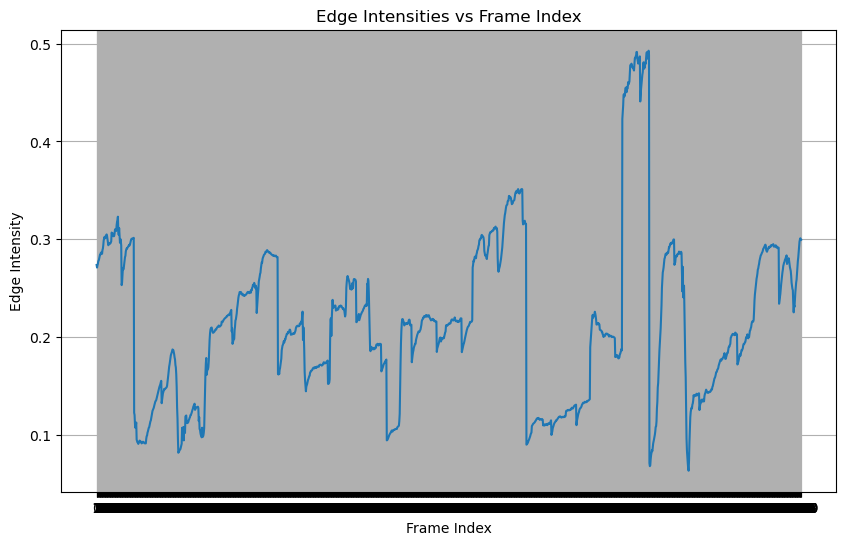

In [31]:
import matplotlib.pyplot as plt

indices = range(len(edge_intensity_arr))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(indices, edge_intensity_arr)
plt.title('Edge Intensities vs Frame Index')
plt.xlabel('Frame Index')
plt.ylabel('Edge Intensity')
plt.grid(True)
plt.xticks(indices)  
plt.show()